# Importações

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder

import joblib

# Análise dos Dados

In [167]:
dados = pd.read_csv('/content/drive/MyDrive/Alura/Challenges/Challenge Dados 1 - Alura Cash/dados_agrupados.csv')
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,33,42000,Rent,4,Medical,C,3600,12.68,0,0.09,Y,5
1,24,113000,Mortgage,5,Education,B,17950,11.99,0,0.16,N,4
2,25,24000,Rent,9,Personal,B,9600,11.71,1,0.40,N,3
3,28,70834,Mortgage,4,Personal,B,20000,12.21,0,0.28,N,9
4,33,63996,Rent,4,Education,B,3200,10.74,0,0.05,N,9


In [168]:
dados.shape

(24921, 12)

In [169]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24921 entries, 0 to 24920
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  24921 non-null  int64  
 1   person_income               24921 non-null  int64  
 2   person_home_ownership       24921 non-null  object 
 3   person_emp_length           24921 non-null  int64  
 4   loan_intent                 24921 non-null  object 
 5   loan_grade                  24921 non-null  object 
 6   loan_amnt                   24921 non-null  int64  
 7   loan_int_rate               24921 non-null  float64
 8   loan_status                 24921 non-null  int64  
 9   loan_percent_income         24921 non-null  float64
 10  cb_person_default_on_file   24921 non-null  object 
 11  cb_person_cred_hist_length  24921 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 2.3+ MB


# Tratando os Dados

Traduzindo o Nome das Colunas

In [170]:
dicionario = {
    'person_age': 'idade',
    'person_income': 'salario',
    'person_home_ownership': 'situacao_moradia',
    'person_emp_length': 'tempo_trabalho',
    'loan_intent': 'motivo_emprestimo',
    'loan_grade': 'pontuacao_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros',
    'loan_status': 'inadimplencia',
    'loan_percent_income': 'renda_percentual_emprestimo',
    'cb_person_default_on_file': 'devendo',
    'cb_person_cred_hist_length': 'tempo_de_credito'
}


dados.rename(dicionario, axis = 1, inplace = True)

In [171]:
dados.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
0,33,42000,Rent,4,Medical,C,3600,12.68,0,0.09,Y,5
1,24,113000,Mortgage,5,Education,B,17950,11.99,0,0.16,N,4
2,25,24000,Rent,9,Personal,B,9600,11.71,1,0.40,N,3
3,28,70834,Mortgage,4,Personal,B,20000,12.21,0,0.28,N,9
4,33,63996,Rent,4,Education,B,3200,10.74,0,0.05,N,9


Traduzindo os valores das colunas

In [172]:
traducao_tipo_casa = {
    'Rent':'Alugada',
    'Mortgage':'Hipotecada',
    'Own':'Propria',
    'Other':'Outro'
}

dados['situacao_moradia'] = dados['situacao_moradia'].map(traducao_tipo_casa)

In [173]:
traducao_tipo_emprestimo = {
    'Medical': 'Médico',
    'Education': 'Educação',
    'Personal': 'Pessoal',
    'Venture': 'Empreendimento',
    'Debtconsolidation': 'Pagar Dívidas',
    'Homeimprovement': 'Reforma'
}

dados['motivo_emprestimo'] = dados['motivo_emprestimo'].map(traducao_tipo_emprestimo)

In [174]:
traducao_historico_inadimplencia = {
    'N': 0,
    'Y': 1
}

dados['devendo'] = dados['devendo'].map(traducao_historico_inadimplencia)

In [175]:
traducao_pontuacao_emprestimo = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

dados['pontuacao_emprestimo'] = dados['pontuacao_emprestimo'].map(traducao_pontuacao_emprestimo)
dados.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
0,33,42000,Alugada,4,Médico,3,3600,12.68,0,0.09,1,5
1,24,113000,Hipotecada,5,Educação,2,17950,11.99,0,0.16,0,4
2,25,24000,Alugada,9,Pessoal,2,9600,11.71,1,0.40,0,3
3,28,70834,Hipotecada,4,Pessoal,2,20000,12.21,0,0.28,0,9
4,33,63996,Alugada,4,Educação,2,3200,10.74,0,0.05,0,9


Verificando valores nulos

In [176]:
dados.isnull().sum()

,0
idade,0
salario,0
situacao_moradia,0
tempo_trabalho,0
motivo_emprestimo,0
pontuacao_emprestimo,0
valor_emprestimo,0
taxa_juros,0
inadimplencia,0
renda_percentual_emprestimo,0


Não há dados nulos.

# Análise dos Outliers

In [177]:
dados.describe()

,idade,salario,tempo_trabalho,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
count,24921.000000,2.492100e+04,24921.000000,24921.000000,24921.000000,24921.000000,24921.000000,24921.000000,24921.000000,24921.000000
mean,27.711007,6.751097e+04,5.490630,2.218089,9818.783355,11.013932,0.206894,0.168844,0.175595,5.792906
std,6.161708,4.956023e+04,3.846649,1.165132,6383.903733,3.238764,0.405087,0.105995,0.380483,4.022011
min,20.000000,4.200000e+03,1.000000,1.000000,500.000000,5.420000,0.000000,0.010000,0.000000,2.000000
25%,23.000000,4.000000e+04,3.000000,1.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.700000e+04,5.000000,2.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,30.000000,8.000000e+04,7.000000,3.000000,13000.000000,13.470000,0.000000,0.230000,0.000000,8.000000
max,84.000000,1.782000e+06,41.000000,7.000000,35000.000000,23.220000,1.000000,0.780000,1.000000,30.000000


In [178]:
colunas_outliers = ['salario','tempo_trabalho','valor_emprestimo','renda_percentual_emprestimo','tempo_de_credito']

for coluna in colunas_outliers:
  Q1 = dados[coluna].quantile(0.25)
  Q3 = dados[coluna].quantile(0.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  outliers = dados[(dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)]
  print(f'Coluna: {coluna} --- Outliers encontrados: {outliers.shape[0]}')


Coluna: salario --- Outliers encontrados: 1205
Coluna: tempo_trabalho --- Outliers encontrados: 1076
Coluna: valor_emprestimo --- Outliers encontrados: 358
Coluna: renda_percentual_emprestimo --- Outliers encontrados: 479
Coluna: tempo_de_credito --- Outliers encontrados: 853


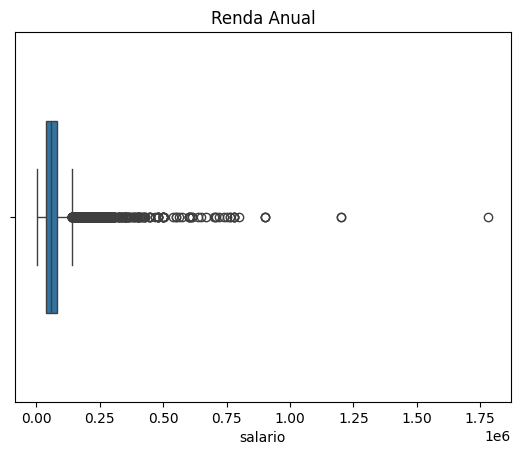

In [179]:
sns.boxplot(data=dados, x="salario", gap=0.35)
plt.title('Renda Anual')
plt.show()

In [180]:
dados[dados['salario'] >= 750000]

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
1295,37,800000,Hipotecada,10,Pagar Dívidas,2,15000,11.36,0,0.02,0,17
3552,32,750000,Hipotecada,2,Pagar Dívidas,2,30000,9.91,0,0.04,0,8
4629,58,780000,Hipotecada,7,Pessoal,1,4500,6.91,0,0.01,0,20
4824,37,900000,Hipotecada,5,Pessoal,3,25000,12.87,0,0.03,1,13
7927,32,1200000,Hipotecada,1,Empreendimento,1,12000,7.51,0,0.01,0,8
9682,58,780000,Hipotecada,7,Pessoal,1,4500,6.91,0,0.01,0,19
10847,63,1782000,Alugada,13,Educação,3,12025,14.27,0,0.01,0,30
13311,36,1200000,Propria,16,Médico,1,10000,6.54,0,0.01,0,11
14338,37,780000,Alugada,9,Reforma,2,7500,12.18,0,0.01,0,15
14346,35,762000,Propria,8,Médico,1,10000,8.94,0,0.01,0,8


Não houve casos de inadimplência para as pessoas com salário acima de 750 mil, levando em consideração que todos os casos de empréstimo dessa amostra não ultrapassaram a quantia de 30 mil, gerando um baixo percentual (empréstimo/renda anual do cliente). Conclui-se que, se o percentual for baixo, o cliente pagará o empréstimo. Pode-se, então, excluir os dados dessa amostra.

In [181]:
dados.drop(dados[dados['salario'] >= 750000].index, inplace=True)

In [182]:
dados[dados['salario'] > 500000]

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
45,51,667680,Hipotecada,19,Pessoal,3,10000,13.98,0,0.01,1,22
111,39,708000,Hipotecada,14,Pagar Dívidas,2,25000,12.18,0,0.04,0,12
1451,36,700000,Hipotecada,16,Médico,3,25000,12.53,0,0.04,1,13
1986,37,600000,Propria,11,Reforma,2,16000,10.25,0,0.03,0,14
4811,42,600000,Outro,2,Reforma,4,25000,14.74,0,0.04,1,16
11477,31,741600,Hipotecada,3,Médico,2,12000,10.25,0,0.02,0,6
12011,40,550000,Hipotecada,5,Médico,2,8000,10.75,0,0.01,0,14
12094,40,540600,Hipotecada,8,Médico,4,35000,15.99,1,0.06,1,11
13074,33,612000,Alugada,3,Pagar Dívidas,3,5950,12.73,0,0.01,1,9
13119,32,572400,Alugada,16,Médico,2,16000,9.76,0,0.03,0,5



Os clientes com salário superior a 500 mil podem, sim, ser inadimplentes. O fato de um cliente ter um salário alto e um histórico de pagamentos positivos não garante que ele sempre pagará suas dívidas. Isso demonstra que há outros fatores influenciando a inadimplência, além da renda e do histórico. Caso esses dados fossem removidos, o modelo poderia aprender que 'alta renda = sempre paga', o que seria um erro.



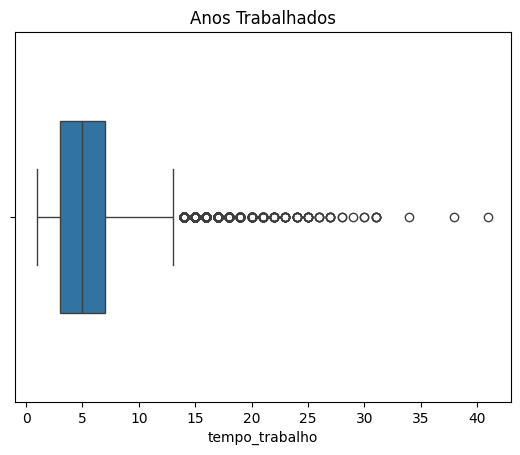

In [183]:
sns.boxplot(data=dados, x="tempo_trabalho", gap=0.35)
plt.title("Anos Trabalhados")
plt.show()

In [184]:
dados[dados['tempo_trabalho'] > 32]

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
16769,53,106000,Hipotecada,38,Pessoal,2,20000,9.88,0,0.19,0,23
18565,78,48000,Alugada,41,Médico,1,3000,7.51,0,0.06,0,25
23072,58,49000,Hipotecada,34,Médico,4,7500,13.55,1,0.15,1,24


A variável 'tempo_trabalho' passou por tratamentos e verificações no SGBD, e, ao analisá-la novamente, não foram encontrados valores discrepantes ou interpretações que possam influenciar negativamente o modelo.

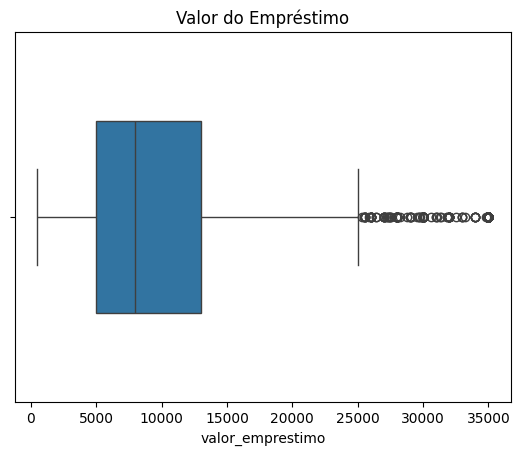

In [185]:
sns.boxplot(data=dados, x="valor_emprestimo", gap=0.35)
plt.title('Valor do Empréstimo')
plt.show()

Em relação aos outliers do valor de empréstimo, não há nada para tratamento.

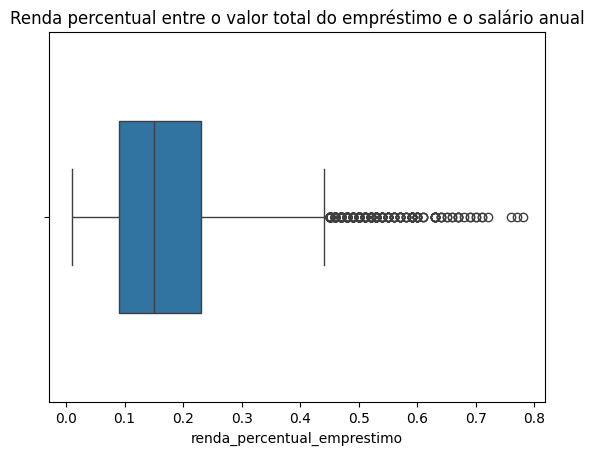

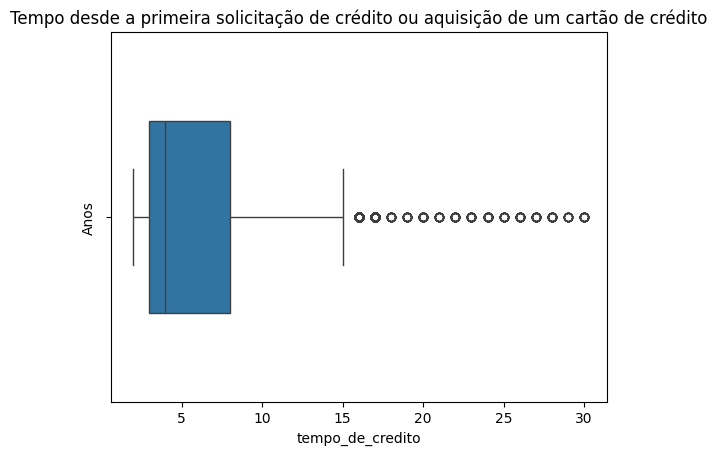

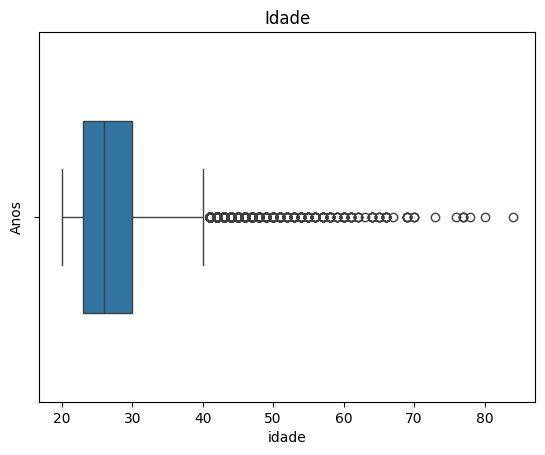

In [186]:
ax = sns.boxplot(data=dados, x="renda_percentual_emprestimo", gap=0.35)
plt.title('Renda percentual entre o valor total do empréstimo e o salário anual')
plt.show()

print("\n")

ax = sns.boxplot(data=dados, x="tempo_de_credito", gap=0.35)
plt.title('Tempo desde a primeira solicitação de crédito ou aquisição de um cartão de crédito')
plt.ylabel('Anos')
plt.show()

print("\n")

ax = sns.boxplot(data=dados, x="idade", gap=0.35)
plt.title('Idade')
plt.ylabel('Anos')
plt.show()

Todas as váriaveis acima também passaram por análises e tratamentos no SGDB

# Correlação das Variáveis

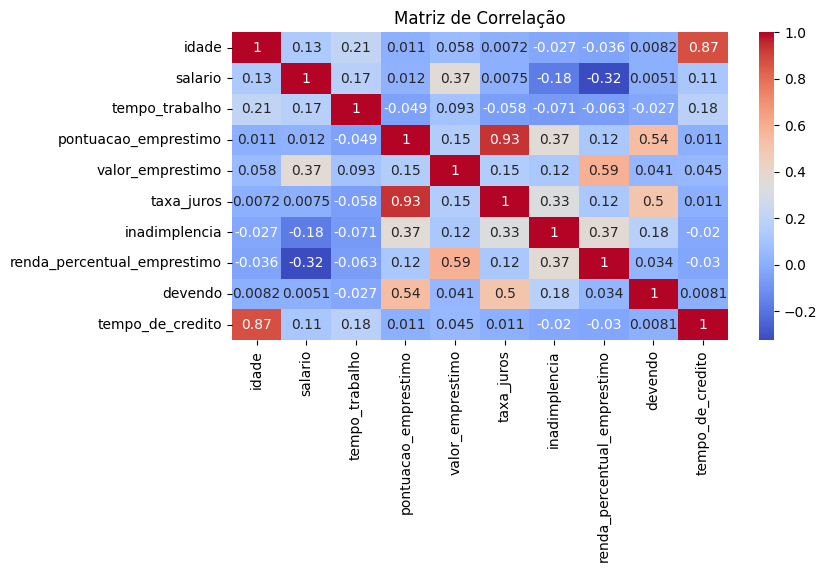

In [187]:
plt.figure(figsize=(8, 4))
sns.heatmap(dados.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Inicialmente, não se observa qualquer forte relação entre as variáveis que influencie a inadimplência. Entretanto, faz-se necessário aplicar a análise de correlação após o procedimento de encoding nas variáveis categóricas.

# Encoding

In [188]:
ohe = OneHotEncoder(handle_unknown='warn', sparse_output=False).set_output(transform='pandas')

In [189]:
ohetransform = ohe.fit_transform(dados[['situacao_moradia', 'motivo_emprestimo']])

In [190]:
ohetransform

,situacao_moradia_Alugada,situacao_moradia_Hipotecada,situacao_moradia_Outro,situacao_moradia_Propria,motivo_emprestimo_Educação,motivo_emprestimo_Empreendimento,motivo_emprestimo_Médico,motivo_emprestimo_Pagar Dívidas,motivo_emprestimo_Pessoal,motivo_emprestimo_Reforma
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
24916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24917,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24919,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [191]:
dados = pd.concat([dados, ohetransform], axis=1).drop(['situacao_moradia', 'motivo_emprestimo'], axis=1)

In [192]:
dados.head()

,idade,salario,tempo_trabalho,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito,situacao_moradia_Alugada,situacao_moradia_Hipotecada,situacao_moradia_Outro,situacao_moradia_Propria,motivo_emprestimo_Educação,motivo_emprestimo_Empreendimento,motivo_emprestimo_Médico,motivo_emprestimo_Pagar Dívidas,motivo_emprestimo_Pessoal,motivo_emprestimo_Reforma
0,33,42000,4,3,3600,12.68,0,0.09,1,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24,113000,5,2,17950,11.99,0,0.16,0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,24000,9,2,9600,11.71,1,0.40,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,70834,4,2,20000,12.21,0,0.28,0,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,63996,4,2,3200,10.74,0,0.05,0,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


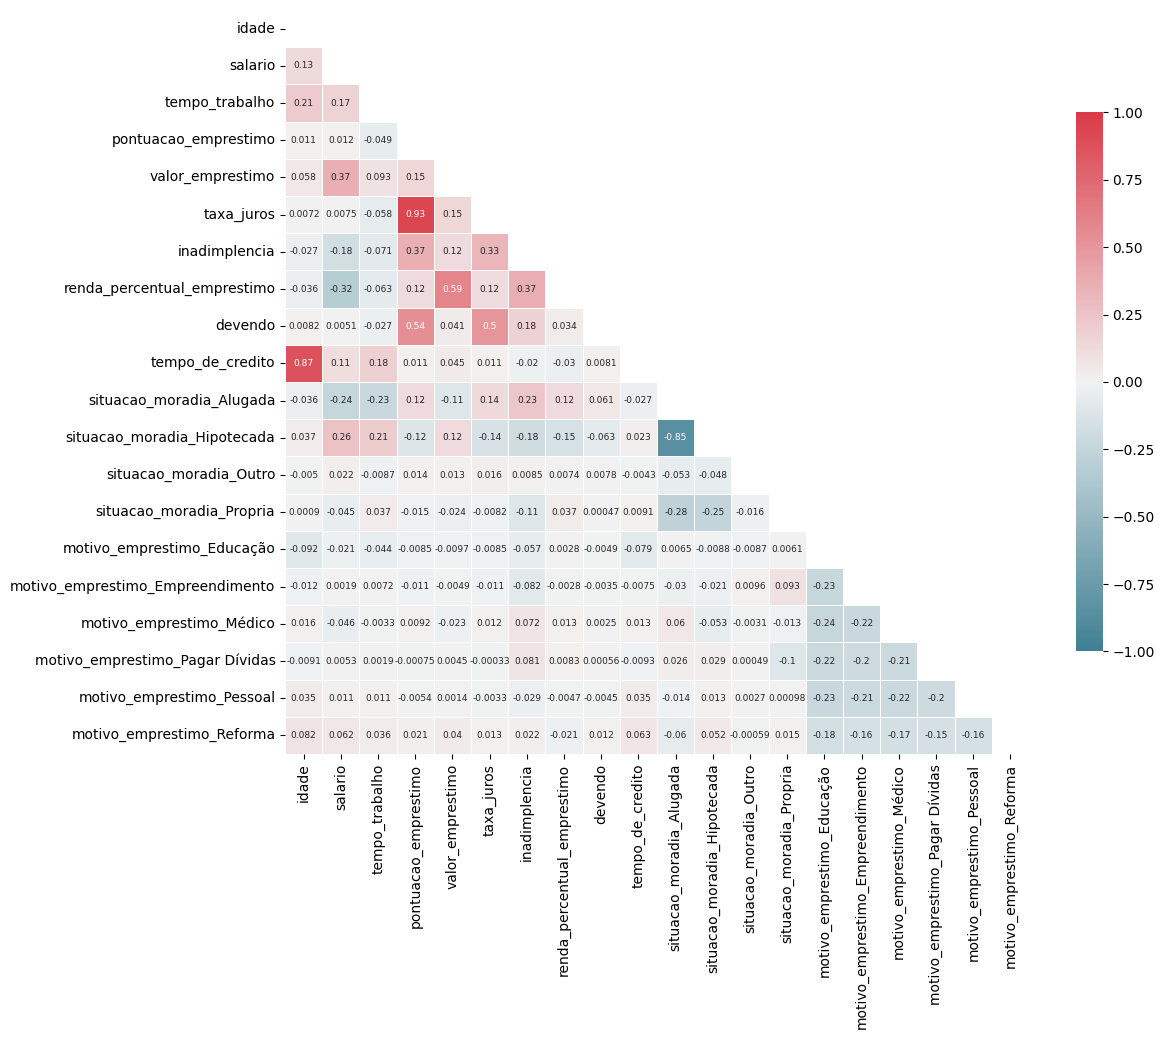

In [193]:
#Verificando a correlacao novamente:
corr = dados.corr()
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(12, 14))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5},
            annot_kws={"size": 6.5})


plt.show()

In [194]:
dados.head()

,idade,salario,tempo_trabalho,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito,situacao_moradia_Alugada,situacao_moradia_Hipotecada,situacao_moradia_Outro,situacao_moradia_Propria,motivo_emprestimo_Educação,motivo_emprestimo_Empreendimento,motivo_emprestimo_Médico,motivo_emprestimo_Pagar Dívidas,motivo_emprestimo_Pessoal,motivo_emprestimo_Reforma
0,33,42000,4,3,3600,12.68,0,0.09,1,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24,113000,5,2,17950,11.99,0,0.16,0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,24000,9,2,9600,11.71,1,0.40,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,70834,4,2,20000,12.21,0,0.28,0,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,63996,4,2,3200,10.74,0,0.05,0,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Balanceamento da Váriavel Alvo

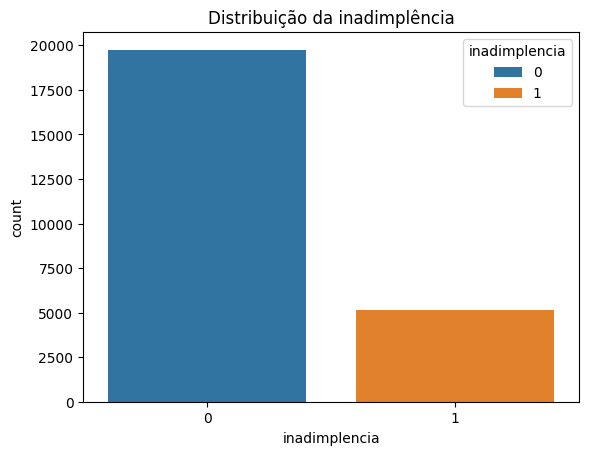

In [195]:
sns.countplot(data=dados, x='inadimplencia', hue='inadimplencia')
plt.title('Distribuição da inadimplência')
plt.show()

In [196]:
x = dados.drop(columns=['inadimplencia'], axis=1)
y = dados['inadimplencia']

seed = 46412

smote_bal = SMOTE(random_state=seed)
x_res, y_res = smote_bal.fit_resample(x, y)

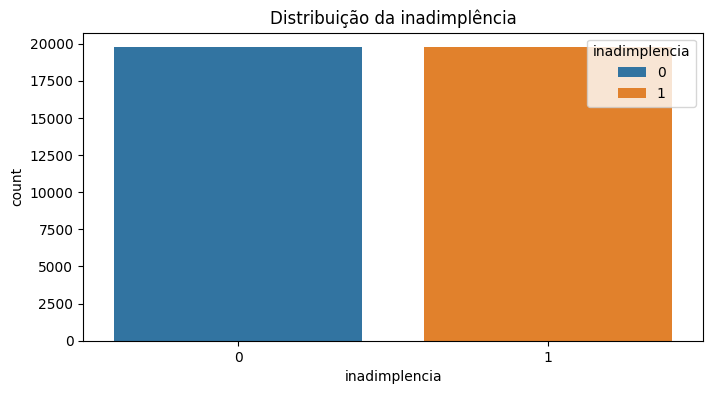

In [197]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_res, hue=y_res)
plt.title('Distribuição da inadimplência')
plt.show()

#Normalização

In [198]:
dados.head()

,idade,salario,tempo_trabalho,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito,situacao_moradia_Alugada,situacao_moradia_Hipotecada,situacao_moradia_Outro,situacao_moradia_Propria,motivo_emprestimo_Educação,motivo_emprestimo_Empreendimento,motivo_emprestimo_Médico,motivo_emprestimo_Pagar Dívidas,motivo_emprestimo_Pessoal,motivo_emprestimo_Reforma
0,33,42000,4,3,3600,12.68,0,0.09,1,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24,113000,5,2,17950,11.99,0,0.16,0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,24000,9,2,9600,11.71,1,0.40,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,70834,4,2,20000,12.21,0,0.28,0,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,63996,4,2,3200,10.74,0,0.05,0,9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [199]:
scaler = StandardScaler()
vars_explicativas = scaler.fit_transform(x_res)

In [200]:
vars_explicativas

array([[ 0.97892852, -0.44538183, -0.31244302, ..., -0.50437303,
        -0.46695029, -0.38751206],
       [-0.5825206 ,  1.19302166, -0.03609794, ..., -0.50437303,
        -0.46695029, -0.38751206],
       [-0.40902625, -0.86075173,  1.06928242, ..., -0.50437303,
         2.41102189, -0.38751206],
       ...,
       [-0.23553191, -0.26077298,  1.06928242, ...,  0.70855934,
        -0.46695029, -0.38751206],
       [-1.10300364, -0.63354439, -0.31244302, ..., -0.50437303,
        -0.46695029, -0.38751206],
       [ 1.84640026, -0.44538183, -0.31244302, ...,  0.97633572,
        -0.46695029, -0.38751206]])

In [201]:
vars_explicativas = pd.DataFrame(vars_explicativas, columns=x.columns)

In [202]:
vars_explicativas.head()

,idade,salario,tempo_trabalho,pontuacao_emprestimo,valor_emprestimo,taxa_juros,renda_percentual_emprestimo,devendo,tempo_de_credito,situacao_moradia_Alugada,situacao_moradia_Hipotecada,situacao_moradia_Outro,situacao_moradia_Propria,motivo_emprestimo_Educação,motivo_emprestimo_Empreendimento,motivo_emprestimo_Médico,motivo_emprestimo_Pagar Dívidas,motivo_emprestimo_Pessoal,motivo_emprestimo_Reforma
0,0.978929,-0.445382,-0.312443,0.503366,-1.008408,0.273205,-0.880772,2.376773,-0.139937,0.900749,-0.795415,-0.061765,-0.247263,-0.499139,-0.451256,2.117231,-0.504373,-0.466950,-0.387512
1,-0.582521,1.193022,-0.036098,-0.340355,1.126985,0.060202,-0.308877,-0.420739,-0.405022,-1.211049,1.366923,-0.061765,-0.247263,2.235110,-0.451256,-0.543931,-0.504373,-0.466950,-0.387512
2,-0.409026,-0.860752,1.069282,-0.340355,-0.115560,-0.026233,1.651906,-0.420739,-0.670106,0.900749,-0.795415,-0.061765,-0.247263,-0.499139,-0.451256,-0.543931,-0.504373,2.411022,-0.387512
3,0.111457,0.219995,-0.312443,-0.340355,1.432041,0.128116,0.671515,-0.420739,0.920400,-1.211049,1.366923,-0.061765,-0.247263,-0.499139,-0.451256,-0.543931,-0.504373,2.411022,-0.387512
4,0.978929,0.062200,-0.312443,-0.340355,-1.067931,-0.325671,-1.207569,-0.420739,0.920400,0.900749,-0.795415,-0.061765,-0.247263,2.235110,-0.451256,-0.543931,-0.504373,-0.466950,-0.387512


# Aplicando Modelos

SVC

In [203]:
treino_x, teste_x, treino_y, teste_y = train_test_split(vars_explicativas, y_res,
                                                         random_state = seed,
                                                         stratify = y_res)

print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 29626
Testaremos com 9876
A acurácia foi de 91.25%


DecisionTreeClassifier

In [204]:
modelo_decisionTree = DecisionTreeClassifier()
modelo_decisionTree.fit(treino_x, treino_y)
previsoes_tree = modelo_decisionTree.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_tree) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 91.77%


# Exportando os Modelos

In [205]:
#Exportando o encoder
joblib.dump(ohe, 'ohe.pkl')

#Exportando o modelo de normalizacao
joblib.dump(scaler, 'scaler.pkl')

#Exportando o modelo
joblib.dump(modelo_decisionTree, 'modelo_decisionTree.pkl')

['modelo_decisionTree.pkl']